In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('C:/Users/tneron2023/PycharmProjects/Python_IA/project_hotel/datas/Hotel_Reservations.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29999 non-null  object 
 1   no_of_adults                          29999 non-null  int64  
 2   no_of_children                        29999 non-null  int64  
 3   no_of_weekend_nights                  29999 non-null  int64  
 4   no_of_week_nights                     29999 non-null  int64  
 5   type_of_meal_plan                     29999 non-null  object 
 6   required_car_parking_space            29999 non-null  int64  
 7   room_type_reserved                    29999 non-null  object 
 8   lead_time                             29999 non-null  int64  
 9   arrival_year                          29999 non-null  int64  
 10  arrival_month                         29999 non-null  int64  
 11  arrival_date   

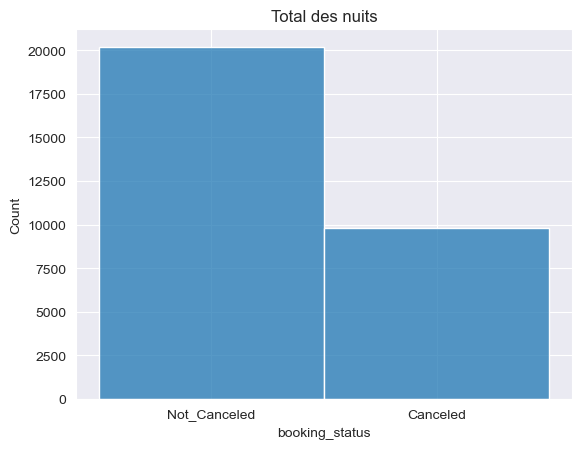

In [5]:
histo_survived = sns.histplot(df['booking_status'], bins = 2)
histo_survived.set_xticks([0 ,1])
histo_survived.set_title('Total des nuits')
plt.show()

In [6]:
# 1. Shape et informations générales
print(f"📊 Dimensions du dataset : {df.shape}")
print(f"📊 Nombre de lignes : {df.shape[0]:,}")
print(f"📊 Nombre de colonnes : {df.shape[1]}")

📊 Dimensions du dataset : (29999, 19)
📊 Nombre de lignes : 29,999
📊 Nombre de colonnes : 19


In [7]:
print("\n🎯 DISTRIBUTION DE LA VARIABLE CIBLE :")
target_counts = df['booking_status'].value_counts()
target_pct = df['booking_status'].value_counts(normalize=True) * 100


🎯 DISTRIBUTION DE LA VARIABLE CIBLE :


In [8]:
print("Effectifs :")
print(target_counts)
print("\nPourcentages :")
print(target_pct.round(2))

Effectifs :
booking_status
Not_Canceled    20184
Canceled         9815
Name: count, dtype: int64

Pourcentages :
booking_status
Not_Canceled    67.28
Canceled        32.72
Name: proportion, dtype: float64


(array([0, 1]), [Text(0, 0, 'Not_Canceled'), Text(1, 0, 'Canceled')])

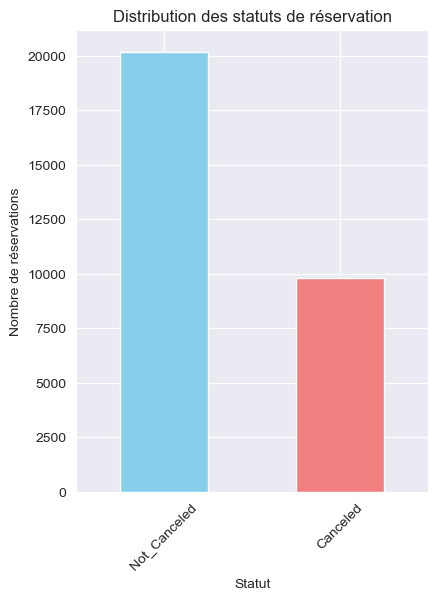

In [9]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['booking_status'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution des statuts de réservation')
plt.xlabel('Statut')
plt.ylabel('Nombre de réservations')
plt.xticks(rotation=45)

Text(0, 0.5, '')

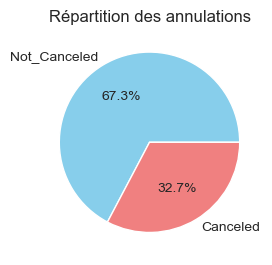

In [10]:
plt.subplot(1, 2, 2)
df['booking_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Répartition des annulations')
plt.ylabel('')

In [11]:
df_clean = df

df_clean.drop(['Booking_ID'], axis=1, inplace=True)

df_clean.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = 'if_binary')

cols_encoded = encoder.fit_transform(df_clean[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']])

cols_encoded_array = cols_encoded.toarray()

new_cols = np.array(cols_encoded_array)

print(new_cols[:5])



[[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [15]:
labels = encoder.get_feature_names_out(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'])
print(labels)

['type_of_meal_plan_Meal Plan 1' 'type_of_meal_plan_Meal Plan 2'
 'type_of_meal_plan_Meal Plan 3' 'type_of_meal_plan_Not Selected'
 'room_type_reserved_Room_Type 1' 'room_type_reserved_Room_Type 2'
 'room_type_reserved_Room_Type 3' 'room_type_reserved_Room_Type 4'
 'room_type_reserved_Room_Type 5' 'room_type_reserved_Room_Type 6'
 'room_type_reserved_Room_Type 7' 'market_segment_type_Aviation'
 'market_segment_type_Complementary' 'market_segment_type_Corporate'
 'market_segment_type_Offline' 'market_segment_type_Online'
 'booking_status_Not_Canceled']


In [17]:
df_cols_encoded = pd.DataFrame(cols_encoded_array, columns=labels)
print (df_cols_encoded)

df_clean = df_clean.join(df_cols_encoded)

df_clean.head(5)

       type_of_meal_plan_Meal Plan 1  type_of_meal_plan_Meal Plan 2  \
0                                1.0                            0.0   
1                                0.0                            0.0   
2                                1.0                            0.0   
3                                1.0                            0.0   
4                                0.0                            0.0   
...                              ...                            ...   
29994                            1.0                            0.0   
29995                            1.0                            0.0   
29996                            1.0                            0.0   
29997                            1.0                            0.0   
29998                            1.0                            0.0   

       type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                                0.0                             0.0   
1  

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
df_clean.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'], axis=1, inplace=True)

df_clean.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,2,0,1,2,0,224,2017,10,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,0,2,3,0,5,2018,11,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,0,2,1,0,1,2018,2,28,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,0,0,2,0,211,2018,5,20,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,0,1,1,0,48,2018,4,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
df_clean.to_csv('C:/Users/tneron2023/PycharmProjects/Python_IA/project_hotel/datas/Hotel_clean.csv', index=False)